In [1]:
#IMPORTING NECESSARY LIBRARIES
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import scipy
from scipy import stats
import random
    

In [77]:
df = pd.read_csv('C:/Users/shubh/Documents/City_day_Delhi.csv')
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Delhi,01-01-2015,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,Severe
1,Delhi,02-01-2015,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454.0,Severe
2,Delhi,03-01-2015,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,143.0,Moderate
3,Delhi,04-01-2015,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,319.0,Very Poor
4,Delhi,05-01-2015,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,325.0,Very Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004,Delhi,27-06-2020,39.80,155.94,10.88,21.46,22.47,31.43,0.87,10.38,18.88,1.69,19.99,0.43,112.0,Moderate
2005,Delhi,28-06-2020,59.52,308.65,12.67,21.60,23.86,29.27,0.94,10.70,18.05,1.71,25.13,1.74,196.0,Moderate
2006,Delhi,29-06-2020,44.86,184.12,10.50,21.57,21.94,27.97,0.88,11.58,26.61,2.13,23.80,1.13,233.0,Poor
2007,Delhi,30-06-2020,39.80,91.98,5.99,17.96,15.44,28.48,0.84,10.51,37.29,1.57,16.37,0.49,114.0,Moderate


In [78]:
df.isnull().sum()

City            0
Date            0
PM2.5           2
PM10           77
NO              2
NO2             2
NOx             0
NH3             9
CO              0
SO2           110
O3             84
Benzene         0
Toluene         0
Xylene        781
AQI            10
AQI_Bucket     10
dtype: int64

In [79]:
def fill_na(x,y):
    array = x
    array2 = y
    array3 = np.isnan(array)
    for i in range (0,len(array)-1):
      if (array3[i,0] == True ): 
         for j in range (0,len(array2)):
             if(array[i,1] == array2[j,1]):
                 array[i,0] = array2[j,0]
    return(array)

In [80]:
df['Date'] = pd.to_datetime(df['Date']) # convert date to values of the date
df['month'] = df['Date'].dt.month

df.shape


(2009, 17)

In [81]:
#replace null values with mean of that months mean
lst = df.columns
lst = lst[2:14]

In [82]:
mean_df = df.groupby('month')[lst].mean()
mean_df['month'] = mean_df.index




In [83]:
mean_df

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,month
month,,,,,,,,,,,,,
1,162.164033,265.601573,44.569116,52.241547,63.192265,49.622056,2.625691,14.874607,49.652402,4.477017,18.335691,1.319587,1
2,130.245854,233.565031,43.276463,52.834146,63.418598,45.330736,2.646280,15.797267,51.321296,3.672561,15.776585,2.182762,2
3,100.117833,206.179045,34.592611,46.576000,52.197667,38.509162,2.320722,16.609774,46.819551,3.357278,14.531278,1.750517,3
4,105.415977,240.083824,39.138621,52.835345,57.343276,38.147586,2.079770,20.289706,56.196959,3.467356,15.926149,1.261786,4
5,102.871278,238.647135,32.528389,51.386000,55.802667,40.334778,2.154278,18.385480,58.376910,3.187444,15.426833,1.041443,5
6,87.296092,202.421802,27.144195,45.850747,46.433103,40.930402,1.459598,12.449020,51.085844,2.774253,13.770632,1.398632,6
7,74.649006,162.378714,26.007019,41.929130,54.535155,39.240497,1.406149,12.595755,45.405000,2.588696,14.631925,1.012436,7
8,76.050313,172.891079,28.572437,43.068000,51.656770,34.721006,1.304720,12.740719,45.479716,2.567578,15.137640,1.186375,8
9,83.406410,173.495260,29.914615,43.976603,49.966987,35.106323,1.302244,13.442734,48.702157,2.740641,15.355513,1.104242,9


In [84]:
#all null values filled with mean of that month as pollutant vary month wise
for i in range(2,14):
 ar =  fill_na(df.iloc[:,[i,16]].values , mean_df.iloc[:,[(i-2),12]].values)
 df.iloc[:,[i]] = ar[0:2009,0]




City           0
Date           0
PM2.5          0
PM10           0
NO             0
NO2            0
NOx            0
NH3            0
CO             0
SO2            0
O3             0
Benzene        0
Toluene        0
Xylene         0
AQI           10
AQI_Bucket    10
month          0
dtype: int64

In [86]:
(df.corr().loc['AQI']).sort_values(ascending = False) #parameters which effect AQI

AQI        1.000000
PM2.5      0.880719
PM10       0.861423
Benzene    0.669889
NO2        0.664940
NO         0.640989
NOx        0.555848
NH3        0.516767
SO2        0.407042
O3         0.320353
CO         0.279836
Toluene    0.278970
Xylene     0.187523
month      0.045990
Name: AQI, dtype: float64

In [87]:
df.groupby('AQI_Bucket')['AQI'].max()

AQI_Bucket
Good             50.0
Moderate        200.0
Poor            300.0
Satisfactory    100.0
Severe          716.0
Very Poor       400.0
Name: AQI, dtype: float64

In [88]:
start_date = '01-01-2015'
end_date = '31-12-2019'
lst = []
mask = (df['Date'] > start_date) & (df['Date'] <= end_date) 
lst = mask
Year_15_19 = df.loc[mask]


In [89]:
start_date = '01-01-2020'
end_date = '31-12-2020'
lst = []
mask = (df['Date'] > start_date) & (df['Date'] <= end_date) 
lst = mask

Year_2020 = df.loc[mask]
Year_2020.head(30)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,month
1827,Delhi,2020-02-01,327.04,439.31,120.76,64.80,143.71,58.26,3.32,19.95,36.50,9.36,73.11,2.65,485.0,Severe,2
1828,Delhi,2020-03-01,228.90,337.04,111.09,55.65,131.13,53.02,2.80,14.93,27.82,6.96,66.80,2.80,426.0,Severe,3
1829,Delhi,2020-04-01,220.60,327.22,86.58,57.67,110.20,53.46,2.20,12.85,29.94,6.81,48.18,5.45,366.0,Very Poor,4
1830,Delhi,2020-05-01,170.21,257.94,29.99,48.25,54.30,47.94,1.23,9.59,30.21,3.70,28.90,4.80,354.0,Very Poor,5
1831,Delhi,2020-06-01,159.64,247.47,35.49,51.19,60.14,47.01,1.27,11.34,21.99,3.52,31.10,1.13,335.0,Very Poor,6
1832,Delhi,2020-07-01,120.31,176.22,24.08,44.90,46.56,43.53,1.18,12.74,22.82,3.64,24.51,0.30,285.0,Poor,7
1833,Delhi,2020-08-01,117.98,145.85,26.65,38.64,45.09,44.73,1.13,8.67,17.63,3.49,22.67,0.19,281.0,Poor,8
1834,Delhi,2020-09-01,89.26,132.06,14.71,32.30,31.03,36.87,0.89,7.28,22.00,2.43,15.34,0.04,231.0,Poor,9
1835,Delhi,2020-10-01,130.82,203.54,27.73,45.12,50.71,37.73,1.30,9.44,27.25,3.80,24.75,0.33,255.0,Poor,10
1836,Delhi,2020-11-01,151.10,245.62,43.83,53.28,69.66,40.97,1.54,11.65,30.98,4.33,28.30,0.86,309.0,Very Poor,11


In [90]:
Polluted_df = ((df.loc[(df['AQI_Bucket'] == 'Severe' ) | (df['AQI_Bucket'] == 'Very Poor' ) ] ))
Polluted_df
good_df = ((df.loc[(df['AQI_Bucket'] == 'Good' ) | (df['AQI_Bucket'] == 'Satisfactory' ) ] ))

In [91]:
Polluted_2020 = ((Year_2020.loc[(df['AQI_Bucket'] == 'Severe' ) | (df['AQI_Bucket'] == 'Very Poor' ) ] ))
Polluted_df
good_2020 = ((Year_2020.loc[(df['AQI_Bucket'] == 'Good' ) | (df['AQI_Bucket'] == 'Satisfactory' ) ] ))

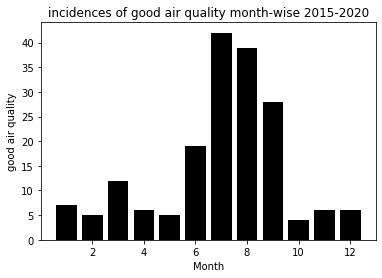

In [92]:
hist = good_df.groupby('month')['NOx'].count()
#hist['month'] = hist.index
plt.bar(hist.index, hist, color ='black',
        width = .8)
plt.xlabel("Month")
plt.ylabel("good air quality")
plt.title("incidences of good air quality month-wise 2015-2020")
plt.show()

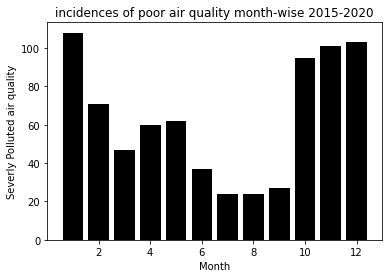

In [93]:
hist2 = Polluted_df.groupby('month')['NOx'].count()
#hist['month'] = hist.index
plt.bar(hist2.index, hist2, color ='black',
        width = .8)
plt.xlabel("Month")
plt.ylabel("Severly Polluted air quality")
plt.title("incidences of poor air quality month-wise 2015-2020")
plt.show()

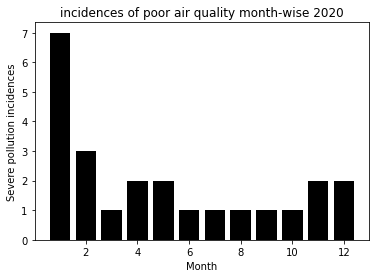

In [94]:
hist = Polluted_2020.groupby('month')['AQI'].count()
#hist['month'] = hist.index

plt.bar(hist.index, hist, color ='black',
        width = .8)
plt.xlabel("Month")
plt.ylabel("Severe pollution incidences")
plt.title("incidences of poor air quality month-wise 2020")
plt.show()

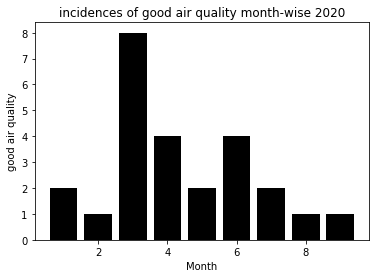

In [95]:
hist = good_2020.groupby('month')['AQI'].count()
#hist['month'] = hist.index

plt.bar(hist.index, hist, color ='black',
        width = .8)
plt.xlabel("Month")
plt.ylabel("good air quality")
plt.title("incidences of good air quality month-wise 2020")
plt.show()

Text(0.5, 1.0, 'comaprison of air Quality 2015-2019 vs 2020')

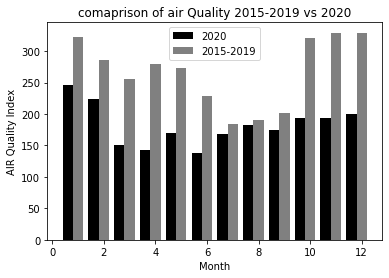

In [96]:
#plotting AQI 2020 vs 2015-2019
hist = Year_2020.groupby('month')['AQI'].mean()
hist2 = Year_15_19.groupby('month')['AQI'].mean()
bar = plt.bar(hist.index - 0.4, hist, color ='black',width = .4, label = '2020')
bar1 = plt.bar(hist2.index , hist2, color ='grey',width = .4,label ='2015-2019')
plt.xlabel("Month")
plt.ylabel("AIR Quality Index")
plt.legend()
plt.title("comaprison of air Quality 2015-2019 vs 2020")
        


Text(0.5, 1.0, 'comaprison of  PM-2.5 2015-2019 vs 2020')

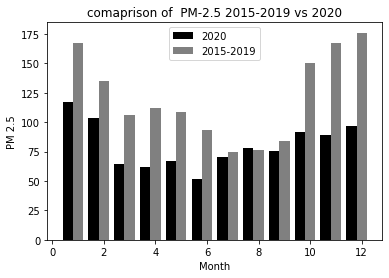

In [97]:
#plotting PM 2.5 2020 vs 2015-2019
hist = Year_2020.groupby('month')['PM2.5'].mean()
hist2 = Year_15_19.groupby('month')['PM2.5'].mean()
bar = plt.bar(hist.index - 0.4, hist, color ='black',width = .4, label = '2020')
bar1 = plt.bar(hist2.index , hist2, color ='grey',width = .4,label ='2015-2019')
plt.xlabel("Month")
plt.ylabel("PM 2.5")
plt.legend()
plt.title("comaprison of  PM-2.5 2015-2019 vs 2020")

Text(0.5, 1.0, 'comaprison of  PM-10 2015-2019 vs 2020')

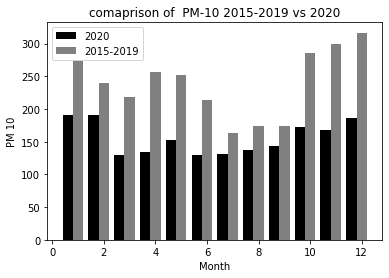

In [98]:
hist = Year_2020.groupby('month')['PM10'].mean()
hist2 = Year_15_19.groupby('month')['PM10'].mean()
bar = plt.bar(hist.index - 0.4, hist, color ='black',width = .4, label = '2020')
bar1 = plt.bar(hist2.index , hist2, color ='grey',width = .4,label ='2015-2019')
plt.xlabel("Month")
plt.ylabel("PM 10")
plt.legend()
plt.title("comaprison of  PM-10 2015-2019 vs 2020")

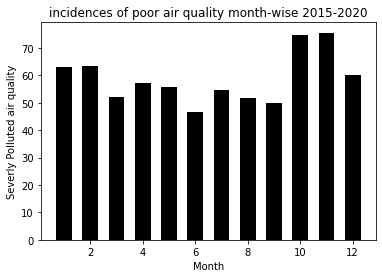

In [99]:
hist2 = df.groupby('month')['NOx'].mean()
#hist['month'] = hist.index
plt.bar(hist2.index, hist2, color ='black',
        width = .6)
plt.xlabel("Month")
plt.ylabel("Severly Polluted air quality")
plt.title("incidences of poor air quality month-wise 2015-2020")
plt.show()

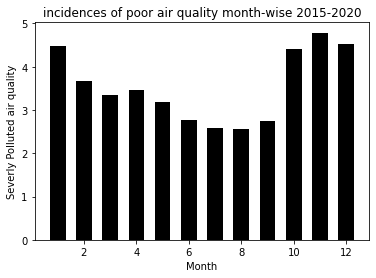

In [100]:
hist2 = df.groupby('month')['Benzene'].mean()
#hist['month'] = hist.index
plt.bar(hist2.index, hist2, color ='black',
        width = .6)
plt.xlabel("Month")
plt.ylabel("Severly Polluted air quality")
plt.title("incidences of poor air quality month-wise 2015-2020")
plt.show()

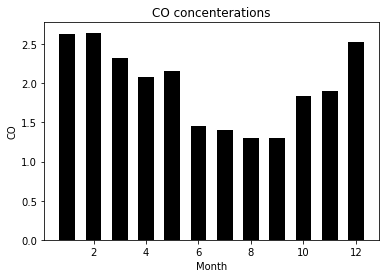

In [101]:
hist2 = df.groupby('month')['CO'].mean()
plt.bar(hist2.index, hist2, color ='black',
        width = .6)
plt.xlabel("Month")
plt.ylabel("CO")
plt.title("CO concenterations")
plt.show()